In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Covid healthy diet/archive

/content/drive/MyDrive/Covid healthy diet/archive


In [ ]:
!ls

fatsupply.csv  foodsupply.csv  proteinsupply.csv  supplyfood.csv


In [ ]:
# 1
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer

# 2. Fatsupply
fatsupply = pd.read_csv('/content/drive/MyDrive/Covid healthy diet/archive/fatsupply.csv')

# Foodsupply
foodsupply = pd.read_csv('/content/drive/MyDrive/Covid healthy diet/archive/foodsupply.csv')

# Proteinsupply
proteinsupply = pd.read_csv('/content/drive/MyDrive/Covid healthy diet/archive/proteinsupply.csv')

# Supplyfood
supplyfood = pd.read_csv('/content/drive/MyDrive/Covid healthy diet/archive/supplyfood.csv')

# 3.
# show 5 rows of fatsupply
print("ข้อมูล fatsupply:")
print(fatsupply.head())

# show 5 rows of foodsupply
print("ข้อมูล foodsupply:")
print(foodsupply.head())

# show 5 rows of proteinsupply
print("ข้อมูล proteinsupply:")
print(proteinsupply.head())

# show 5 rows of supplyfood
print("ข้อมูล supplyfood:")
print(supplyfood.head())

ข้อมูล fatsupply:
               Country  Alcoholic Beverages  Animal Products  Animal fats  \
0          Afghanistan                  0.0          21.6397       6.2224   
1              Albania                  0.0          32.0002       3.4172   
2              Algeria                  0.0          14.4175       0.8972   
3               Angola                  0.0          15.3041       1.3130   
4  Antigua and Barbuda                  0.0          27.7033       4.6686   

   Aquatic Products, Other  Cereals - Excluding Beer    Eggs  Fish, Seafood  \
0                      0.0                    8.0353  0.6859         0.0327   
1                      0.0                    2.6734  1.6448         0.1445   
2                      0.0                    4.2035  1.2171         0.2008   
3                      0.0                    6.5545  0.1539         1.4155   
4                      0.0                    3.2153  0.3872         1.5263   

   Fruits - Excluding Wine     Meat  ...  Ve

In [ ]:
# Check the column names in each DataFrames
print(fatsupply.columns)
print(foodsupply.columns)
print(proteinsupply.columns)
print(supplyfood.columns)

Index(['Country', 'Alcoholic Beverages', 'Animal Products', 'Animal fats',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Miscellaneous',
       'Milk - Excluding Butter', 'Offals', 'Oilcrops', 'Pulses', 'Spices',
       'Starchy Roots', 'Stimulants', 'Sugar Crops', 'Sugar & Sweeteners',
       'Treenuts', 'Vegetal Products', 'Vegetable Oils', 'Vegetables',
       'Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'Population', 'Unit (all except Population)'],
      dtype='object')
Index(['Country', 'Alcoholic Beverages', 'Animal Products', 'Animal fats',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Milk - Excluding Butter', 'Offals', 'Oilcrops', 'Pulses', 'Spices',
       'Starchy Roots', 'Stimulants', 'Sugar Crops', 'Sugar & Sweeteners',
       'Treenuts', 'Vegetal Products', 'Vege

In [ ]:
# 4. merge fatsupply, foodsupply, และ proteinsupply

data = fatsupply.merge(foodsupply, on='Country').merge(proteinsupply, on='Country')

# 5. Here is the Python code to check the data after merging and display the first 5 rows of the merged DataFrame:
print("ข้อมูลหลังจากการรวมจาก fatsupply, foodsupply, และ proteinsupply:")
print(data.head())

ข้อมูลหลังจากการรวมจาก fatsupply, foodsupply, และ proteinsupply:
               Country  Alcoholic Beverages_x  Animal Products_x  \
0          Afghanistan                    0.0            21.6397   
1              Albania                    0.0            32.0002   
2              Algeria                    0.0            14.4175   
3               Angola                    0.0            15.3041   
4  Antigua and Barbuda                    0.0            27.7033   

   Animal fats_x  Aquatic Products, Other_x  Cereals - Excluding Beer_x  \
0         6.2224                        0.0                      8.0353   
1         3.4172                        0.0                      2.6734   
2         0.8972                        0.0                      4.2035   
3         1.3130                        0.0                      6.5545   
4         4.6686                        0.0                      3.2153   

   Eggs_x  Fish, Seafood_x  Fruits - Excluding Wine_x   Meat_x  ...  \
0  0

In [ ]:
# 6. Data transformation 'Undernourished_x' and 'Undernourished_y' to a numeric
data['Undernourished_x'] = pd.to_numeric(data['Undernourished_x'].replace('<2.5', 2.5),errors='coerce')
data['Undernourished_y'] = pd.to_numeric(data['Undernourished_y'].replace('<2.5', 2.5),errors='coerce')
data['Undernourished'] = pd.to_numeric(data['Undernourished'].replace('<2.5', 2.5),errors='coerce')

# 7. Replace NaN with the mean of each column
data['Undernourished_x'].fillna(data['Undernourished_x'].mean(), inplace=True)
data['Undernourished_y'].fillna(data['Undernourished_y'].mean(), inplace=True)
data['Undernourished'].fillna(data['Undernourished'].mean(), inplace=True)

# 8. Check the data transformation
print(data['Undernourished_x'].unique())
print(data['Undernourished_y'].unique())
print(data['Undernourished'].unique())

[29.8         6.2         3.9        25.         11.22944785  4.6
  4.3         2.5        14.7         7.5        10.1        17.1
 26.4         3.6        20.         12.6        16.4         9.9
 59.6        37.5         2.7         8.5         4.8        40.3
 19.          5.6        18.9         9.5         7.9         4.5
  9.          2.9        20.6         3.7         4.2        10.5
 10.2         5.5        15.2        16.5        28.          8.1
 49.3        12.9        14.5         8.3         4.9        29.
  8.         12.2        29.4        47.8         2.8         7.1
 11.         13.1        37.2        44.4        17.5        10.3
  6.3        10.4         6.5        13.4         3.4        27.9
 10.6        27.3         8.7        17.          3.2         6.8
 20.3        10.         10.7         9.7        13.3        36.8
  5.7         7.         11.3        25.6         8.9        20.1
  3.5         7.8        24.9        16.1         5.4        41.
  2.6       

9. การเข้ารหัสข้อมูลคอลัมน์ 'Country': ใช้ LabelEncoder เพื่อแปลงคอลัมน์ที่มีข้อมูลเป็นข้อความ (ชื่อประเทศ) ให้กลายเป็นตัวเลขที่สามารถใช้ในโมเดล Machine Learning ได้
<br><br>
10. เตรียมข้อมูลสำหรับสร้างโมเดล: ลบคอลัมน์ที่ไม่ต้องการใช้ในการทำนาย เช่น ชื่อประเทศ (Country) และข้อมูล COVID-19 ที่เกี่ยวข้อง (Confirmed, Recovered, Active) รวมถึงข้อมูลหน่วย (Unit)
<br><br>
11. แบ่งข้อมูลเป็นชุดฝึกและทดสอบ: ใช้ train_test_split() เพื่อแบ่งข้อมูลออกเป็นชุดฝึก (80%) และชุดทดสอบ (20%) สำหรับการสร้างโมเดลและการประเมินผล
<br><br>
12. จัดการค่าที่เป็น NaN: ลบแถวที่มีค่าขาดหายไป (NaN) ในชุดข้อมูล X และ y ทั้งชุดฝึกและชุดทดสอบ เพื่อให้มั่นใจว่าไม่มีค่า NaN เหลืออยู่ในการสร้างโมเดล

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# 9. การเข้ารหัสข้อมูลคอลัมน์ 'Country' ด้วย LabelEncoder
# สร้าง LabelEncoder สำหรับแปลงข้อมูลจากคอลัมน์ 'Country' ให้เป็นตัวเลขแทนชื่อประเทศ
le = LabelEncoder()

# แปลงข้อมูลคอลัมน์ 'Country' เป็นตัวเลข
data['Country_encoded'] = le.fit_transform(data['Country'])

# 10. เตรียมข้อมูลสำหรับสร้างโมเดล
# ลบคอลัมน์ที่ไม่ต้องการใช้ เช่น 'Country' (ชื่อประเทศ), 'Deaths' (ตัวแปรเป้าหมาย), 'Confirmed', 'Recovered', 'Active', และคอลัมน์ที่เกี่ยวกับ Unit
X = data.drop(['Country', 'Deaths', 'Confirmed', 'Recovered', 'Active', 'Unit (all except Population)', 'Unit (all except Population)_x', 'Unit (all except Population)_y'], axis=1)
# กำหนดตัวแปรเป้าหมาย (y) ให้เป็นคอลัมน์ 'Deaths'
y = data['Deaths']

# 11. แบ่งข้อมูลเป็นชุดฝึกและทดสอบ
# ใช้ train_test_split เพื่อแบ่งข้อมูลออกเป็นชุดฝึก (80%) และชุดทดสอบ (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 12. จัดการค่าที่เป็น NaN ในชุดข้อมูล
# ลบค่าที่เป็น NaN ใน X_train และ X_test โดยลบแถวที่ y_train และ y_test มีค่า NaN
# การทำเช่นนี้เพื่อให้แน่ใจว่าชุดข้อมูลสมบูรณ์สำหรับการเทรนและทดสอบโมเดล
X_train = X_train[~y_train.isna()]  # ลบแถวที่ y_train เป็น NaN
y_train = y_train.dropna()  # ลบค่าที่เป็น NaN ใน y_train

X_test = X_test[~y_test.isna()]  # ลบแถวที่ y_test เป็น NaN
y_test = y_test.dropna()  # ลบค่าที่เป็น NaN ใน y_test


13. เติมค่าที่เป็น NaN ด้วยค่าเฉลี่ยของคอลัมน์: ใช้ SimpleImputer โดยกำหนดกลยุทธ์เป็น mean เพื่อแทนที่ค่าที่ขาดหายไป (NaN) ในข้อมูลด้วยค่าเฉลี่ยของแต่ละคอลัมน์
<br><br>
14. ใช้ Imputer กับข้อมูล train และ test: ใช้ imputer.fit_transform() สำหรับชุดฝึก (X_train) และ imputer.transform() สำหรับชุดทดสอบ (X_test) เพื่อให้แน่ใจว่าข้อมูลไม่มีค่า NaN ก่อนจะนำไปใช้ในโมเดล
<br><br>
15. เติมค่าที่เป็น NaN ใน y_train และ y_test: สำหรับตัวแปรเป้าหมาย (y_train และ y_test) ใช้ fillna() เพื่อแทนค่า NaN ด้วยค่าเฉลี่ยของคอลัมน์

In [ ]:
from sklearn.impute import SimpleImputer

# 13. เติมค่าที่เป็น NaN ด้วยค่าเฉลี่ยของคอลัมน์
# สร้างตัวแปร SimpleImputer เพื่อใช้แทนค่าที่เป็น NaN ด้วยค่าเฉลี่ยของแต่ละคอลัมน์
imputer = SimpleImputer(strategy='mean')

# 14. ใช้ Imputer กับข้อมูลชุดฝึก (train) และชุดทดสอบ (test)
# ใช้ imputer แทนค่า NaN ใน X_train และ X_test ด้วยค่าเฉลี่ยของแต่ละคอลัมน์
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# 15. เติมค่าที่เป็น NaN ใน y_train และ y_test ด้วยค่าเฉลี่ย
# สำหรับตัวแปรเป้าหมาย (y_train และ y_test) ใช้ฟังก์ชัน fillna() เพื่อแทนค่าที่เป็น NaN ด้วยค่าเฉลี่ยของคอลัมน์
y_train.fillna(y_train.mean(), inplace=True)
y_test.fillna(y_test.mean(), inplace=True)

<h1>Training Data<h1>

16.1. Train โมเดล: ฟังก์ชันจะเริ่มจากการเทรนโมเดลโดยใช้ข้อมูลชุดฝึก (X_train และ y_train)
<br><br>
16.2. ทำนายผล: หลังจากโมเดลถูกเทรนแล้ว จะใช้โมเดลนี้ทำนายค่าตัวแปรเป้าหมายในชุดทดสอบ (X_test)
<br><br>
16.3.คำนวณเมตริกสำหรับประเมินผล:
- Mean Squared Error (MSE): วัดค่าความคลาดเคลื่อนของโมเดลด้วยการยกกำลังสองของผลต่างระหว่างค่าจริงและค่าทำนาย
- Mean Absolute Error (MAE): วัดค่าความคลาดเคลื่อนของโมเดลด้วยการใช้ค่าผลต่างสัมบูรณ์
- R-Squared (R²): วัดความแม่นยำของโมเดลในการอธิบายข้อมูล โดยค่า R² ใกล้เคียงกับ 1 แสดงว่าโมเดลอธิบายข้อมูลได้ดี
<br><br>
16.4.คืนค่าเมตริก: ฟังก์ชันจะคืนค่า MSE, MAE, และ R-Squared ที่ใช้ประเมินผลการทำงานของโมเดล

In [ ]:
# 16. สร้างฟังก์ชันสำหรับการประเมินโมเดล
# ฟังก์ชันนี้จะรับโมเดลและชุดข้อมูลสำหรับ train/test เพื่อประเมินผลลัพธ์ของโมเดล
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # 16.1 Train โมเดล
    # เทรนโมเดลโดยใช้ข้อมูลชุดฝึก (X_train และ y_train)
    model.fit(X_train, y_train)

    # 16.2 ทำนายผล
    # ใช้โมเดลที่เทรนแล้วทำนายผลลัพธ์ในชุดทดสอบ (X_test)
    y_pred = model.predict(X_test)

    # 16.3 คำนวณเมตริกสำหรับประเมินผล
    # คำนวณ Mean Squared Error (MSE) ซึ่งเป็นค่าเฉลี่ยของผลต่างยกกำลังสองระหว่างค่าจริงและค่าทำนาย
    mse = mean_squared_error(y_test, y_pred)

    # คำนวณ Mean Absolute Error (MAE) ซึ่งเป็นค่าเฉลี่ยของผลต่างสัมบูรณ์ระหว่างค่าจริงและค่าทำนาย
    mae = mean_absolute_error(y_test, y_pred)

    # คำนวณ R-Squared ซึ่งบอกความสามารถของโมเดลในการอธิบายข้อมูล
    r2 = r2_score(y_test, y_pred)

    # 16.4 คืนค่าเมตริก MSE, MAE, และ R-Squared
    return mse, mae, r2


17. สร้างโมเดลและประเมินผล: ใช้โมเดลต่างๆ เช่น Linear Regression, Ridge, Lasso, ElasticNet, Random Forest, และ XGBoost ในการเทรนข้อมูลและทดสอบ โดยใช้ฟังก์ชัน evaluate_model() เพื่อคำนวณเมตริกต่างๆ ได้แก่ MSE, MAE, และ R-Squared

In [ ]:
# 17. การสร้างโมเดลและการประเมินผล

# 17.1 Linear Regression
# สร้างโมเดล Linear Regression และประเมินผล
lr_model = LinearRegression()
mse_lr, mae_lr, r2_lr = evaluate_model(lr_model, X_train, X_test, y_train, y_test)

# 17.2 Ridge Regression
# สร้างโมเดล Ridge Regression โดยตั้งค่า alpha = 1.0 และประเมินผล
ridge_model = Ridge(alpha=1.0)
mse_ridge, mae_ridge, r2_ridge = evaluate_model(ridge_model, X_train, X_test, y_train, y_test)

# 17.3 Lasso Regression
# สร้างโมเดล Lasso Regression โดยตั้งค่า alpha = 0.01 และประเมินผล
lasso_model = Lasso(alpha=0.01, max_iter=10000)
mse_lasso, mae_lasso, r2_lasso = evaluate_model(lasso_model, X_train, X_test, y_train, y_test)

# 17.4 Elastic Net Regression
# สร้างโมเดล Elastic Net โดยตั้งค่า alpha = 0.01 และ l1_ratio = 0.5 และประเมินผล
elastic_model = ElasticNet(alpha=0.01, l1_ratio=0.5)
mse_elastic, mae_elastic, r2_elastic = evaluate_model(elastic_model, X_train, X_test, y_train, y_test)

# 17.5 Random Forest Regression
# สร้างโมเดล Random Forest Regression โดยตั้งค่า n_estimators = 100 และประเมินผล
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
mse_rf, mae_rf, r2_rf = evaluate_model(rf_model, X_train, X_test, y_train, y_test)

# 17.6 XGBoost Regression
# สร้างโมเดล XGBoost โดยตั้งค่า n_estimators = 100 และประเมินผล
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
mse_xgb, mae_xgb, r2_xgb = evaluate_model(xgb_model, X_train, X_test, y_train, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.159e-05, tolerance: 3.308e-05
  model = cd_fast.enet_coordinate_descent(


<h1>Evaluation</h1>

18. เปรียบเทียบประสิทธิภาพของโมเดล: ผลลัพธ์จากโมเดลแต่ละตัวจะถูกนำมาแสดงในรูปแบบตารางเพื่อเปรียบเทียบประสิทธิภาพ โดยแสดงค่า MSE, MAE และ R-Squared สำหรับแต่ละโมเดล

In [ ]:
# 18. การเปรียบเทียบประสิทธิภาพของโมเดลในรูปแบบตาราง
import pandas as pd

# รวบรวมผลลัพธ์จากโมเดลต่างๆ เป็นตารางสำหรับเปรียบเทียบ
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet', 'Random Forest', 'XGBoost'],
    'MSE': [mse_lr, mse_ridge, mse_lasso, mse_elastic, mse_rf, mse_xgb],
    'MAE': [mae_lr, mae_ridge, mae_lasso, mae_elastic, mae_rf, mae_xgb],
    'R-Squared': [r2_lr, r2_ridge, r2_lasso, r2_elastic, r2_rf, r2_xgb]
})

# แสดงตารางเปรียบเทียบผลลัพธ์
print(results)

               Model           MSE           MAE  R-Squared
0  Linear Regression  4.780777e-18  1.671648e-09   1.000000
1              Ridge  8.669923e-04  2.216876e-02   0.496309
2              Lasso  1.400412e-03  2.174215e-02   0.186411
3         ElasticNet  1.223790e-03  2.070241e-02   0.289022
4      Random Forest  7.318209e-06  1.720130e-03   0.995748
5            XGBoost  9.347406e-06  1.826677e-03   0.994569


จากผลลัพธ์ที่คุณได้รับ เราสามารถสรุปได้ดังนี้:

1. Linear Regression: มีค่า MSE ต่ำมาก (4.78e-18) และค่า R-Squared ใกล้เคียงกับ 1 (1.000) แสดงว่าโมเดลสามารถทำนายข้อมูลได้เกือบสมบูรณ์ ซึ่งอาจเกิดจากการ overfitting
2. Ridge Regression: ค่า R-Squared ประมาณ 0.4963 แสดงว่าโมเดลสามารถอธิบายข้อมูลได้เพียงครึ่งหนึ่ง
3. Lasso Regression และ Elastic Net: ค่า R-Squared ต่ำกว่ามากเมื่อเทียบกับโมเดลอื่นๆ (0.186 และ 0.289 ตามลำดับ) และมีค่า MSE สูงกว่า Ridge ซึ่งแสดงว่าโมเดลเหล่านี้ไม่เหมาะสมกับข้อมูลนี้
4. Random Forest และ XGBoost: ทั้งสองโมเดลนี้มีประสิทธิภาพสูงมาก ค่า R-Squared ใกล้เคียงกับ 1 (0.9957 และ 0.9946 ตามลำดับ) และค่า MSE ต่ำมาก ซึ่งบ่งบอกว่าทั้งสองโมเดลนี้ทำนายได้แม่นยำมาก

การวิเคราะห์:
1. Linear Regression ดูเหมือนจะ overfit เนื่องจากค่า R-Squared ใกล้ 1 มากเกินไป
2. Random Forest และ XGBoost เป็นโมเดลที่มีความแม่นยำสูงและดูเหมือนจะเป็นตัวเลือกที่เหมาะสมสำหรับชุดข้อมูลนี้
3. Ridge, Lasso, และ ElasticNet ไม่ทำงานได้ดีเท่ากับโมเดลที่ซับซ้อนกว่า เช่น Random Forest และ XGBoost

ข้อเสนอแนะ:
1. ลองใช้ Cross-validation: การทดสอบด้วย Cross-validation อาจช่วยให้เข้าใจความสามารถของโมเดลในการทำนายข้อมูลที่ไม่เคยเห็นมาก่อน
2. ปรับค่า Hyperparameters: สำหรับ Ridge, Lasso, Elastic Net คุณอาจต้องปรับค่า alpha และ l1_ratio เพื่อหาค่าที่เหมาะสมที่สุด


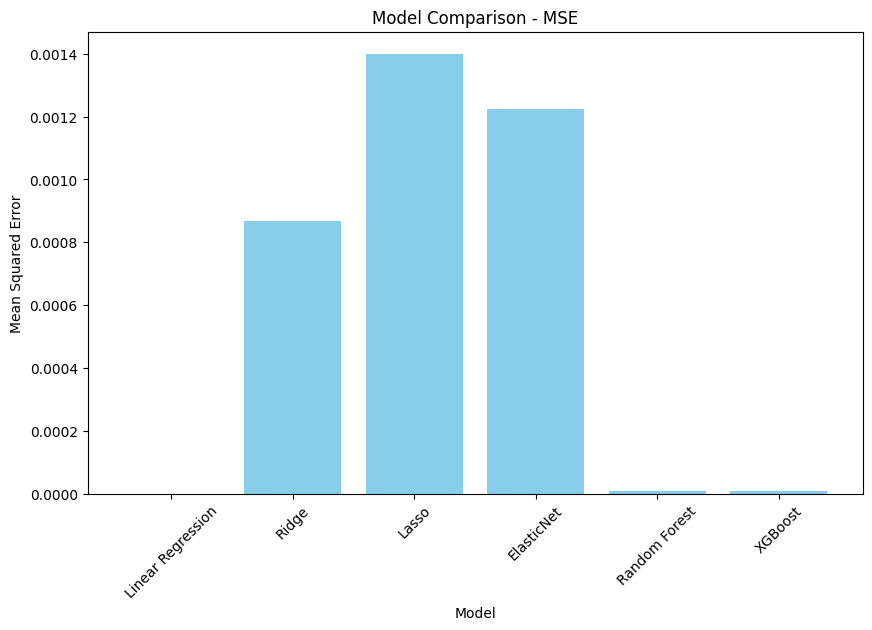

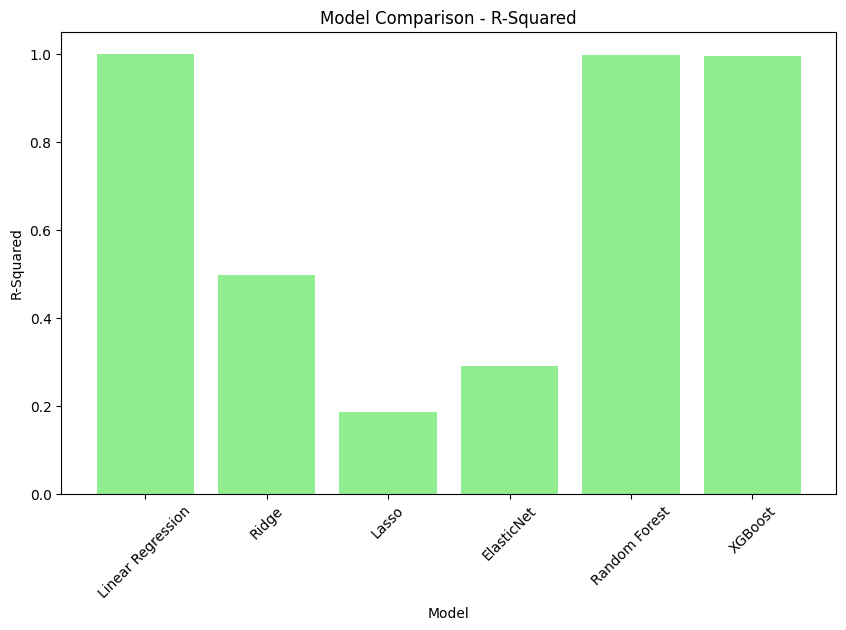

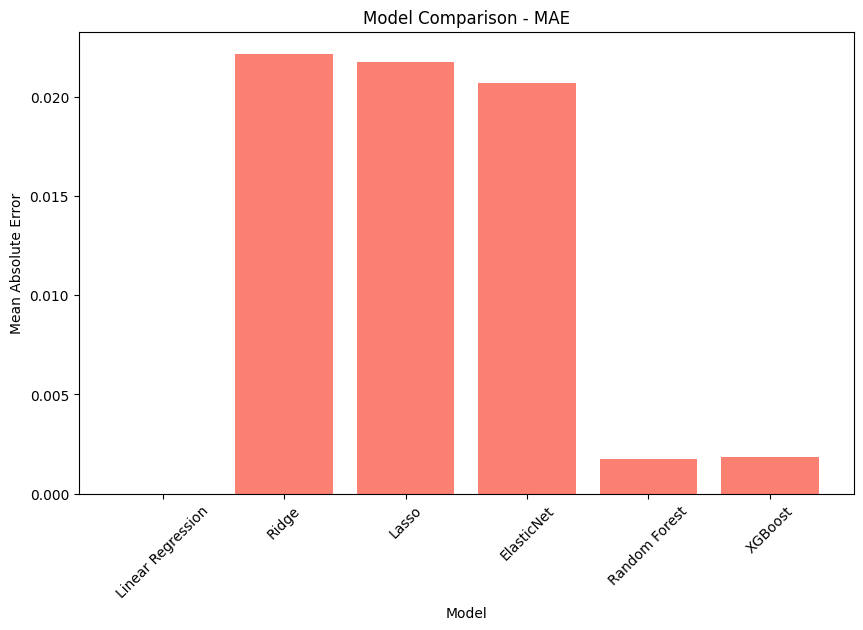

In [ ]:
import matplotlib.pyplot as plt

# Plot ค่า MSE
plt.figure(figsize=(10, 6))
plt.bar(results['Model'], results['MSE'], color='skyblue')
plt.title('Model Comparison - MSE')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.show()

# Plot ค่า R-Squared
plt.figure(figsize=(10, 6))
plt.bar(results['Model'], results['R-Squared'], color='lightgreen')
plt.title('Model Comparison - R-Squared')
plt.xlabel('Model')
plt.ylabel('R-Squared')
plt.xticks(rotation=45)
plt.show()

# Plot ค่า MAE
plt.figure(figsize=(10, 6))
plt.bar(results['Model'], results['MAE'], color='salmon')
plt.title('Model Comparison - MAE')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
plt.show()


สรุปผลจากการ Plot:
1. กราฟ MSE: แสดงให้เห็นว่าโมเดล Lasso และ ElasticNet มีค่า MSE สูงกว่าเมื่อเปรียบเทียบกับโมเดลอื่นๆ โดยโมเดล Random Forest และ XGBoost มีค่า MSE ต่ำมาก ซึ่งบ่งชี้ว่าโมเดลเหล่านี้ทำนายได้อย่างแม่นยำ
2. กราฟ R-Squared: โมเดล Linear Regression มีค่า R-Squared ใกล้ 1 ซึ่งบ่งบอกถึงการ overfitting ขณะที่โมเดล Random Forest และ XGBoost มีค่า R-Squared สูงและมีประสิทธิภาพดีเช่นกัน
3. กราฟ MAE: แสดงให้เห็นว่าโมเดล Random Forest และ XGBoost มีค่า MAE ต่ำที่สุด ซึ่งบ่งชี้ว่าค่าที่ทำนายออกมามีความคลาดเคลื่อนน้อย

ข้อเสนอแนะเพิ่มเติม:
1. โมเดล Random Forest และ XGBoost ดูเหมือนจะมีประสิทธิภาพที่ดีที่สุดในการทำนายสำหรับชุดข้อมูลของคุณ
2. โมเดล Lasso และ ElasticNet อาจต้องปรับค่า hyperparameters ให้เหมาะสมมากขึ้น

<h2>Feature Importance Analysis<h2>

สำหรับ Random Forest และ XGBoost
ในโมเดล Random Forest และ XGBoost คุณสามารถใช้คุณสมบัติ feature_importances_ เพื่อดึงข้อมูลความสำคัญของฟีเจอร์ที่โมเดลใช้ในการทำนายได้ ซึ่งจะช่วยให้เราเข้าใจว่าฟีเจอร์ใดมีผลกระทบมากที่สุดต่อการทำนาย

19. Feature Importance Analysis:
Random Forest: ใช้ rf_model.feature_importances_ เพื่อดึงข้อมูลความสำคัญของฟีเจอร์แต่ละตัว และนำมาเก็บใน rf_importance_df เพื่อแสดงผลลัพธ์โดยเรียงลำดับความสำคัญ
XGBoost: ใช้ xgb_model.feature_importances_ เพื่อนำข้อมูลความสำคัญของฟีเจอร์ในโมเดล XGBoost มาเก็บใน xgb_importance_df โดยเรียงลำดับความสำคัญเช่นกัน

In [ ]:
# 19. การวิเคราะห์ Feature Importance สำหรับ Random Forest และ XGBoost

# Random Forest - Feature Importance
rf_feature_importance = rf_model.feature_importances_
rf_features = X.columns

# สร้าง DataFrame เพื่อแสดง Feature Importance
rf_importance_df = pd.DataFrame({
    'Feature': rf_features,
    'Importance': rf_feature_importance
}).sort_values(by='Importance', ascending=False)

print("Feature Importance - Random Forest:")
print(rf_importance_df)

# XGBoost - Feature Importance
xgb_feature_importance = xgb_model.feature_importances_
xgb_features = X.columns

# สร้าง DataFrame เพื่อแสดง Feature Importance
xgb_importance_df = pd.DataFrame({
    'Feature': xgb_features,
    'Importance': xgb_feature_importance
}).sort_values(by='Importance', ascending=False)

print("Feature Importance - XGBoost:")
print(xgb_importance_df)

Feature Importance - Random Forest:
                      Feature    Importance
26                   Deaths_x  5.320616e-01
56                   Deaths_y  4.591282e-01
27                Recovered_x  7.423633e-04
60        Alcoholic Beverages  4.484896e-04
61                Animal fats  3.893239e-04
..                        ...           ...
46              Sugar Crops_y  5.302485e-08
17              Sugar Crops_x  2.394678e-08
18       Sugar & Sweeteners_x  1.176159e-09
3   Aquatic Products, Other_x  0.000000e+00
0       Alcoholic Beverages_x  0.000000e+00

[87 rows x 2 columns]
Feature Importance - XGBoost:
                 Feature  Importance
26              Deaths_x    0.986286
6        Fish, Seafood_x    0.004027
2          Animal fats_x    0.001343
45          Stimulants_y    0.000937
12            Oilcrops_x    0.000564
..                   ...         ...
47  Sugar & Sweeteners_y    0.000000
48            Treenuts_y    0.000000
49    Vegetal Products_y    0.000000
51          V

Random Forest - Feature Importance Visualization


<ipython-input-110-d2ce7de795eb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')


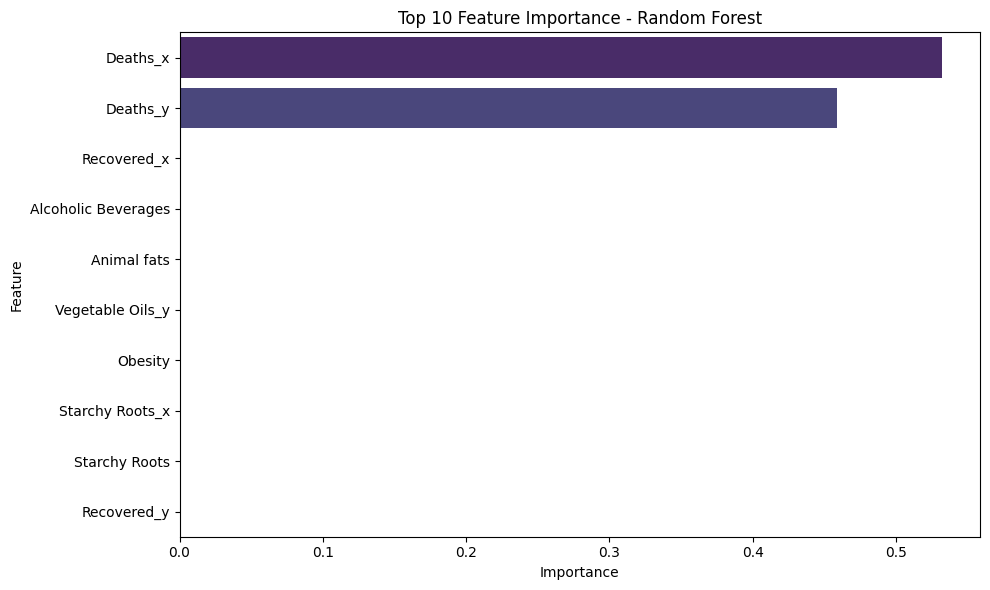

XGBoost - Feature Importance Visualization


<ipython-input-110-d2ce7de795eb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')


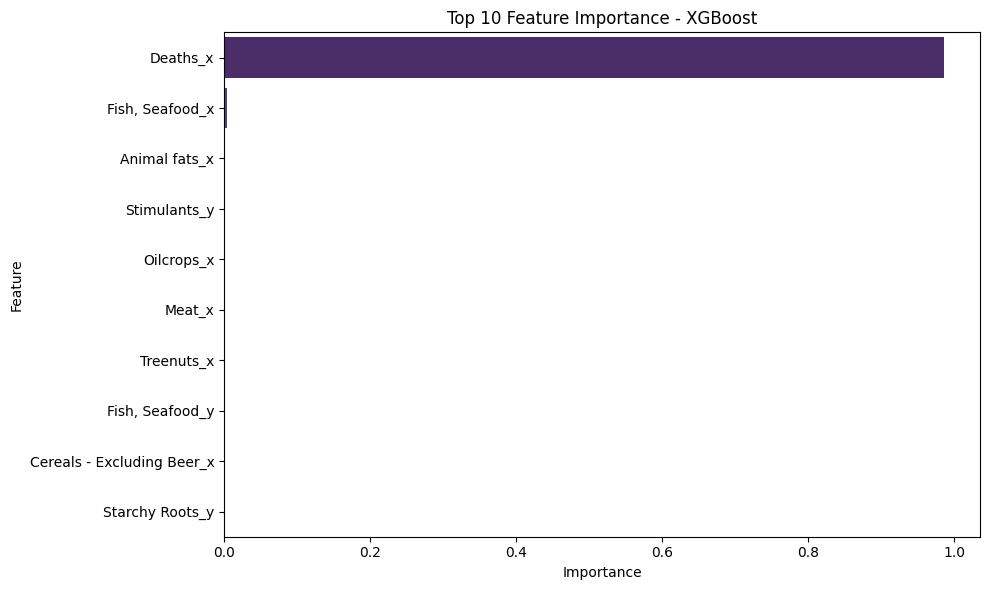

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ฟังก์ชันสำหรับสร้าง Visualization ของ Feature Importance
def plot_feature_importance(importance_df, model_name):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
    plt.title(f'Top 10 Feature Importance - {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

# Visualization for Random Forest
print("Random Forest - Feature Importance Visualization")
plot_feature_importance(rf_importance_df, 'Random Forest')

# Visualization for XGBoost
print("XGBoost - Feature Importance Visualization")
plot_feature_importance(xgb_importance_df, 'XGBoost')


- Random Forest - Feature Importance:
ฟีเจอร์ที่มีความสำคัญสูงสุดใน Random Forest ได้แก่ Deaths_x และ Deaths_y ซึ่งคิดเป็น 53% และ 46% ตามลำดับ แสดงให้เห็นว่าค่าการเสียชีวิตจากแหล่งข้อมูลนี้มีอิทธิพลอย่างมากต่อการทำนาย
ฟีเจอร์ที่มีความสำคัญรองลงมา เช่น Recovered_x, Alcoholic Beverages และ Animal fats มีค่าความสำคัญต่ำกว่าอย่างมาก
บางฟีเจอร์มีค่า Importance ใกล้เคียงกับ 0 เช่น Sugar Crops_x, Sugar & Sweeteners_x และ Aquatic Products, Other_x ซึ่งแสดงให้เห็นว่าฟีเจอร์เหล่านี้ไม่มีอิทธิพลต่อการทำนาย
<br><br>
- **XGBoost - Feature Importance:**
ฟีเจอร์ Deaths_x มีค่า Importance สูงถึง 98.6% ซึ่งแสดงให้เห็นว่า XGBoost ให้ความสำคัญกับฟีเจอร์นี้อย่างมากในการทำนาย
ฟีเจอร์ที่มีความสำคัญรองลงมา เช่น Fish, Seafood_x และ Animal fats_x แต่ค่าความสำคัญของฟีเจอร์เหล่านี้น้อยมากเมื่อเทียบกับ Deaths_x
ฟีเจอร์จำนวนมาก เช่น Treenuts_y, Vegetal Products_y, และ Spices_y มีค่า Importance เท่ากับ 0 ซึ่งหมายความว่าฟีเจอร์เหล่านี้ไม่ส่งผลกระทบต่อการทำนายในโมเดล XGBoost
<br><br>
- **การวิเคราะห์:**
Random Forest ให้ความสำคัญกับหลายฟีเจอร์มากกว่า XGBoost แต่ยังคงให้ค่าความสำคัญสูงสุดกับฟีเจอร์ Deaths_x และ Deaths_y
XGBoost เน้นที่ฟีเจอร์หลักเดียวอย่าง Deaths_x มากกว่าฟีเจอร์อื่นๆ และฟีเจอร์ที่เหลือมีความสำคัญน้อยมาก
การที่ฟีเจอร์บางตัวมีค่า Importance ใกล้เคียงหรือเท่ากับ 0 แสดงว่าโมเดลไม่พิจารณาฟีเจอร์เหล่านี้ในการทำนายผล ซึ่งอาจช่วยให้พิจารณาลดหรือลบฟีเจอร์ที่ไม่มีความสำคัญออก เพื่อปรับปรุงโมเดลให้มีประสิทธิภาพยิ่งขึ้น

<h2>Cross-Validation สำหรับโมเดล Ridge, Lasso, Elastic Net, และ Random Forest</h2>

การใช้ Cross-Validation จะช่วยประเมินประสิทธิภาพของโมเดลได้ดีขึ้น เนื่องจากจะวัดผลจากการแบ่งข้อมูลหลายๆ ชุด ทำให้ผลลัพธ์มีความเสถียรมากขึ้นและลดการ overfitting

20. Cross-Validation:
ใช้ cross_val_score() กับโมเดลต่างๆ เช่น Ridge, Lasso, Elastic Net, และ Random Forest โดยตั้งค่า cv=5 เพื่อทำการ 5-fold cross-validation และเก็บผลลัพธ์ R-Squared ของแต่ละรอบในตัวแปร ridge_cv_scores, lasso_cv_scores, elastic_cv_scores, และ rf_cv_scores
คำนวณค่าเฉลี่ยของ R-Squared แต่ละโมเดลเพื่อดูว่าค่าเฉลี่ยของโมเดลเหล่านี้เป็นอย่างไรในการทดสอบหลายๆ รอบ

In [ ]:
# 20. การทำ Cross-Validation สำหรับ Ridge, Lasso, Elastic Net, และ Random Forest
from sklearn.model_selection import cross_val_score

# Ridge Regression - Cross-Validation
ridge_cv_scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='r2')
print(f'Ridge Regression Cross-Validation R-Squared scores: {ridge_cv_scores}')
print(f'Mean R-Squared (Ridge CV): {ridge_cv_scores.mean()}')

# Lasso Regression - Cross-Validation
lasso_cv_scores = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='r2')
print(f'Lasso Regression Cross-Validation R-Squared scores: {lasso_cv_scores}')
print(f'Mean R-Squared (Lasso CV): {lasso_cv_scores.mean()}')

# Elastic Net - Cross-Validation
elastic_cv_scores = cross_val_score(elastic_model, X_train, y_train, cv=5, scoring='r2')
print(f'Elastic Net Cross-Validation R-Squared scores: {elastic_cv_scores}')
print(f'Mean R-Squared (ElasticNet CV): {elastic_cv_scores.mean()}')

# Random Forest - Cross-Validation
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
print(f'Random Forest Cross-Validation R-Squared scores: {rf_cv_scores}')
print(f'Mean R-Squared (Random Forest CV): {rf_cv_scores.mean()}')

Ridge Regression Cross-Validation R-Squared scores: [0.76316956 0.46732393 0.60675826 0.51012612 0.75473101]
Mean R-Squared (Ridge CV): 0.6204217749871604
Lasso Regression Cross-Validation R-Squared scores: [0.82517991 0.62545416 0.72448762 0.60623579 0.69242305]
Mean R-Squared (Lasso CV): 0.6947561053478553
Elastic Net Cross-Validation R-Squared scores: [0.80836056 0.63698267 0.7321526  0.59750903 0.69483735]
Mean R-Squared (ElasticNet CV): 0.6939684430412717


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.184e-05, tolerance: 2.432e-05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.065e-05, tolerance: 2.652e-05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.384e-02, tolerance: 2.866e

Random Forest Cross-Validation R-Squared scores: [0.98967638 0.98673491 0.99133538 0.98686159 0.98428569]
Mean R-Squared (Random Forest CV): 0.9877787899877617


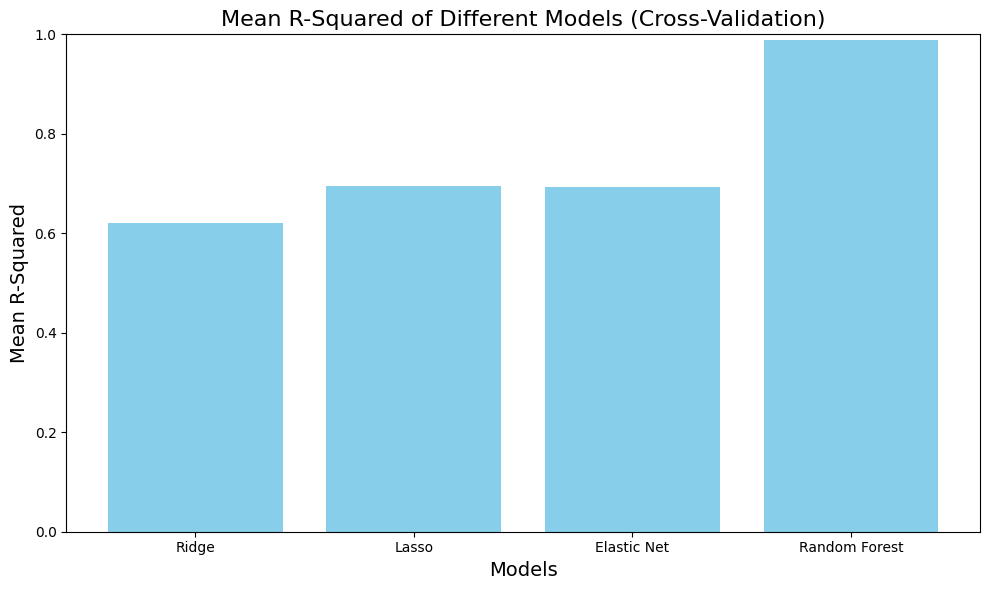

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# สร้างข้อมูลสำหรับแต่ละโมเดล
models = ['Ridge', 'Lasso', 'Elastic Net', 'Random Forest']
mean_r2_scores = [ridge_cv_scores.mean(), lasso_cv_scores.mean(), elastic_cv_scores.mean(), rf_cv_scores.mean()]

# สร้างกราฟ bar plot สำหรับเปรียบเทียบ Mean R-Squared ของแต่ละโมเดล
plt.figure(figsize=(10, 6))
plt.bar(models, mean_r2_scores, color='skyblue')

# เพิ่มรายละเอียดกราฟ
plt.title('Mean R-Squared of Different Models (Cross-Validation)', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Mean R-Squared', fontsize=14)
plt.ylim(0, 1)  # ตั้งค่าสเกลแกน Y ให้แสดงผลในช่วง 0-1
plt.tight_layout()

# แสดงกราฟ
plt.show()

จากผลลัพธ์ของการทำ Cross-Validation R-Squared scores สำหรับโมเดลต่างๆ เราสามารถสรุปได้ดังนี้:

1. Ridge Regression:
ค่า R-Squared อยู่ระหว่าง 0.4673 ถึง 0.7632 สำหรับแต่ละรอบของการทำ Cross-Validation
ค่าเฉลี่ย Mean R-Squared เท่ากับ 0.6204 ซึ่งแสดงให้เห็นว่าโมเดลมีความสามารถปานกลางในการอธิบายความแปรปรวนของข้อมูล
2. Lasso Regression:
ค่า R-Squared อยู่ระหว่าง 0.6062 ถึง 0.8252 ซึ่งแสดงให้เห็นว่า Lasso ให้ผลลัพธ์ที่ดีกว่า Ridge ในทุกๆ รอบของ Cross-Validation
ค่าเฉลี่ย Mean R-Squared เท่ากับ 0.6948 ทำให้เห็นว่าโมเดลนี้มีความสามารถในการอธิบายข้อมูลดีกว่า Ridge
3. Elastic Net Regression:
ค่า R-Squared อยู่ในช่วง 0.5975 ถึง 0.8084 ซึ่งใกล้เคียงกับ Lasso
ค่าเฉลี่ย Mean R-Squared เท่ากับ 0.6940 ซึ่งใกล้เคียงกับ Lasso แต่ยังต่ำกว่าเล็กน้อย
4. Random Forest:
ค่า R-Squared สูงมากในทุกๆ รอบของ Cross-Validation โดยอยู่ระหว่าง 0.9843 ถึง 0.9913
ค่าเฉลี่ย Mean R-Squared เท่ากับ 0.9878 แสดงให้เห็นว่า Random Forest เป็นโมเดลที่ดีที่สุดในกลุ่มนี้ เนื่องจากมีความสามารถในการทำนายที่แม่นยำมาก
<br><br>
**สรุป:**
Random Forest มีค่า R-Squared ที่ดีที่สุด โดยเฉพาะในทุกๆ รอบของ Cross-Validation ซึ่งบ่งบอกว่าโมเดลนี้สามารถอธิบายข้อมูลได้ดีที่สุดและมีประสิทธิภาพสูงสุด
Lasso และ Elastic Net มีผลลัพธ์ที่ใกล้เคียงกันและดีกว่า Ridge แต่ยังไม่สามารถแข่งขันกับ Random Forest ได้
Ridge เป็นโมเดลที่ให้ผลลัพธ์แย่ที่สุดในกลุ่มนี้ แต่ก็ยังสามารถอธิบายข้อมูลได้ในระดับหนึ่ง
<br><br>
**กราฟที่แสดงผล:**
กราฟแสดงให้เห็นว่า Random Forest มีค่า Mean R-Squared ที่สูงที่สุดเมื่อเปรียบเทียบกับโมเดลอื่นๆ ในการทำ Cross-Validation ซึ่งแสดงให้เห็นว่าเป็นโมเดลที่มีประสิทธิภาพสูงสุดในงานนี้.

